# 26. Двунаправленные (bidirectional) рекуррентные нейронные сети

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

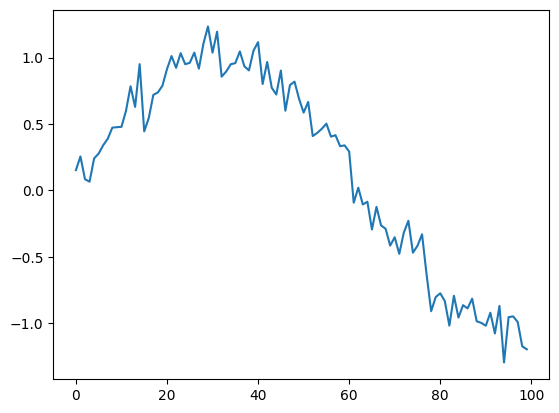

In [2]:
N = 10000
data = np.array([np.sin(x/20) for x in range(N)]) + 0.1 * np.random.randn(N)
plt.plot(data[:100])
plt.show()

In [4]:
off = 3
length = off * 2 + 1
X = np.array([np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N - length)])
Y = data[off:N-off-1]
print(X.shape, Y.shape, sep='\n')

(9993, 6, 6)
(9993,)


In [5]:
#model NN

model = Sequential()
model.add(Input((length-1, length-1)))
model.add(Bidirectional(GRU(2)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 4)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125 (500.00 B)

 Trainable params: 125 (500.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

history = model.fit(X, Y, batch_size=32, epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2283
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0121
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0122
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0124
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0122
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0119
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0118


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/tmp/ipykernel_10297/1027428419.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  XX[i+off+1] = y


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

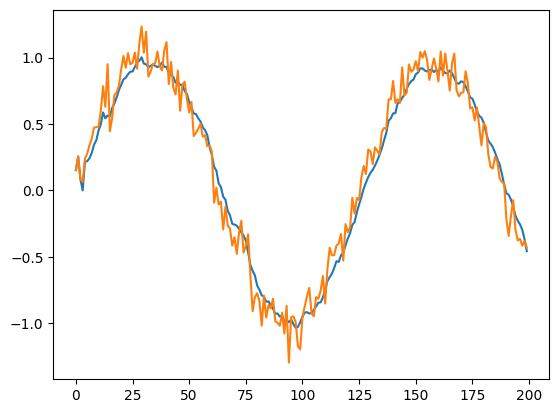

In [7]:
M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
    x = np.diag(np.hstack((XX[i:i + off], data[i+off+1:i+length])))
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    XX[i+off+1] = y
    
plt.plot(XX[:M])
plt.plot(data[:M])
plt.show()